# Project 1 - Iris Flower Classification Project using Machine Learning

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img1.png?raw=true" width="500" height="100"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from plotnine import *
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/orlandojrps/Project1/main/Dataset/dataset1.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


## Check balance of the Database
<img src="https://github.com/orlandojrps/Project1/blob/main/images/img2.png?raw=true" width="500" height="100"/>

In [78]:
total = df.groupby('species').agg(n = ('species','count')).reset_index()
# total = df.groupby('species', as_index=False).agg(n = ('species','count')) #Alternative code for indexing
#total = df.groupby('species', as_index=False).agg({'species':'count'})
#total = df.groupby('species').agg(n=pd.NamedAgg(column='species', aggfunc='count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [48]:
type(total)

pandas.core.frame.DataFrame

In [79]:
total

,species,n,perc
0,setosa,50,50.0
1,versicolor,50,50.0


## Check Outliers
<img src="https://github.com/orlandojrps/Project1/blob/main/images/img3.png?raw=true" width="300" height="100"/>

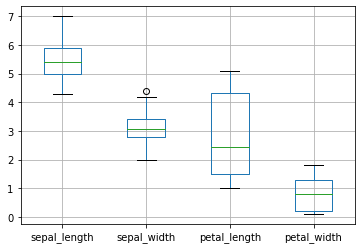

In [80]:
df.boxplot()

## Split Target and Features

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img12.png?raw=true" width="300" height="100"/>

In [81]:
X = df.drop(columns = ['species'])
y = df['species']

## Split Train and Test. Target and Features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train the model with the most common Supervised Algorithms

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img8.png?raw=true" width="250" height="80"/>

In [83]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)
CART = DecisionTreeClassifier(min_samples_leaf=10).fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)
SVM = SVC(probability=True).fit(X_train, y_train) 
RF = RandomForestClassifier().fit(X_train, y_train)

# How does it works?

In [91]:
X_train2 = X_train.copy()
X_train2['probability LR'] = LR.predict_proba(X_train)[:,1]
X_train2['probability SVM'] = SVM.predict_proba(X_train)[:,1]

X_train2['probability CART'] = CART.predict_proba(X_train)[:,1]
X_train2['probability KNN'] = KNN.predict_proba(X_train)[:,1]
X_train2['probability LDA'] = LDA.predict_proba(X_train)[:,1]
X_train2['probability RF'] = RF.predict_proba(X_train)[:,1]

X_train2['cutoff / threshold'] = 0.5
X_train2['predicted LR'] = LR.predict(X_train)
X_train2['predicted SVM'] = SVM.predict(X_train)

X_train2['predicted CART'] = CART.predict(X_train)
X_train2['predicted KNN'] = KNN.predict(X_train)
X_train2['predicted LDA'] = LDA.predict(X_train)
X_train2['predicted RF'] = RF.predict(X_train)


X_train2

,sepal_length,sepal_width,petal_length,petal_width,probability LR,probability SVM,probability CART,probability KNN,probability LDA,probability RF,cutoff / threshold,predicted LR,predicted SVM,predicted CART,predicted KNN,predicted LDA,predicted RF
28,5.2,3.4,1.4,0.2,0.027948,0.025077,0.0,0.0,1.646690e-25,0.00,0.5,setosa,setosa,setosa,setosa,setosa,setosa
93,5.0,2.3,3.3,1.0,0.885142,0.934180,1.0,1.0,1.000000e+00,1.00,0.5,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
5,5.4,3.9,1.7,0.4,0.045435,0.042091,0.0,0.0,2.905606e-24,0.00,0.5,setosa,setosa,setosa,setosa,setosa,setosa
66,5.6,3.0,4.5,1.5,0.991455,0.983775,1.0,1.0,1.000000e+00,1.00,0.5,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
65,6.7,3.1,4.4,1.4,0.992200,0.970098,1.0,1.0,1.000000e+00,1.00,0.5,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,5.0,2.0,3.5,1.0,0.937784,0.962341,1.0,1.0,1.000000e+00,1.00,0.5,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
71,6.1,2.8,4.0,1.3,0.979818,0.975003,1.0,1.0,1.000000e+00,1.00,0.5,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor
14,5.8,4.0,1.2,0.2,0.014736,0.018553,0.0,0.0,1.020259e-33,0.04,0.5,setosa,setosa,setosa,setosa,setosa,setosa
92,5.8,2.6,4.0,1.2,0.978630,0.979027,1.0,1.0,1.000000e+00,1.00,0.5,versicolor,versicolor,versicolor,versicolor,versicolor,versicolor


## Choosing Metric

In [92]:
print("Training accuracy LR:", LR.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Training accuracy LDA:", LDA.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Training accuracy CART:", CART.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Training accuracy KNN:", KNN.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Training accuracy SVM:", SVM.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Training accuracy RF:", SVM.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")

Training accuracy LR: 1.0 

Training accuracy LDA: 1.0 

Training accuracy CART: 1.0 

Training accuracy KNN: 1.0 

Training accuracy SVM: 1.0 

Training accuracy RF: 1.0 



## Save & Load Model using Pickle

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img9.png?raw=true" width="200" height="80"/>

In [93]:
pickle.dump(LR, open('Modelo_Iris.sav', 'wb'))

## Load Model using Pickle

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img10.png?raw=true" width="300" height="100"/>


In [94]:
loaded_model = pickle.load(open('Modelo_Iris.sav', 'rb'))

## Testing with X_test and y_test, Check for overfitting

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img11.png?raw=true" width="150" height="80"/>

In [97]:
print("Training accuracy LR:", loaded_model.score(X_test, y_test), "\n")

Training accuracy LR: 1.0 

